In [46]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [47]:
model.layers

In [48]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [49]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.022632815 0.2417884


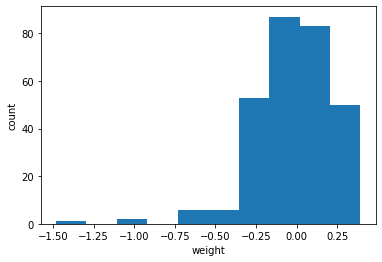

In [50]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

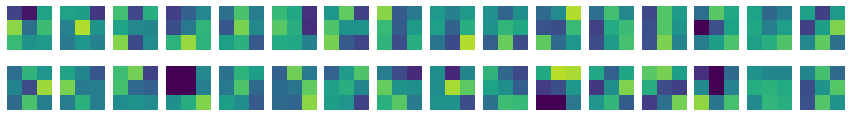

In [51]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [52]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [53]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [54]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0019447833 0.08096951


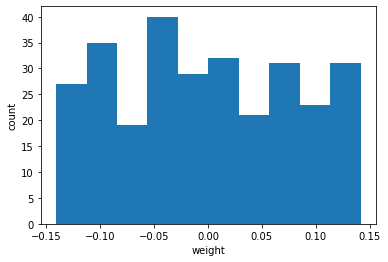

In [55]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

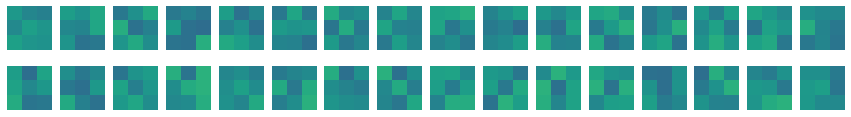

In [56]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [57]:
# dense1= keras.layers.Dense(100, activation='sigmoid')
# dense2= keras.layers.Dense(10, activation='softmax')
# inputs= keras.Input(shape=(784,))
# hidden= dense1(inputs)
# outputs=dense2(hidden)
# model =keras.Model(inputs, outputs)

In [58]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_5_input'), name='conv2d_5_input', description="created by layer 'conv2d_5_input'")


In [59]:
conv_acti=keras.Model(model.input, model.layers[0].output)

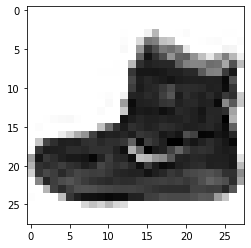

In [60]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [61]:
inputs=train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 174ms/step


In [62]:
print(feature_maps.shape)

(1, 28, 28, 32)


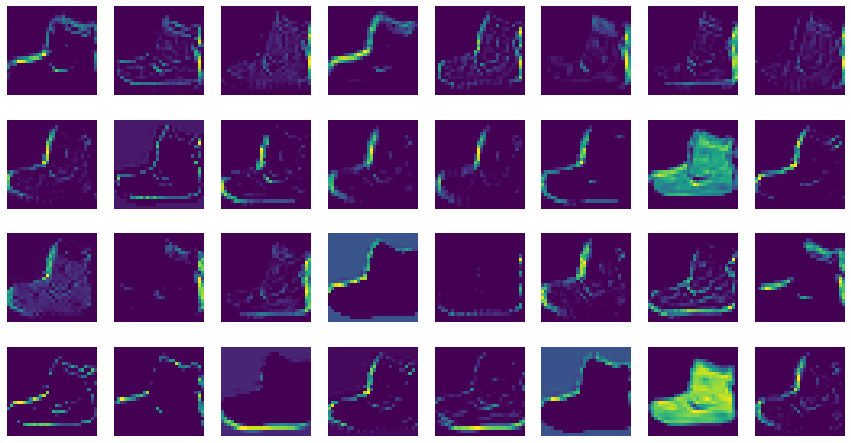

In [63]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
plt.show()

In [65]:
conv2_acti=keras.Model(model.input, model.layers[2].output)

In [66]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/ 255
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 64ms/step


In [67]:
print(feature_maps.shape)

(1, 14, 14, 64)


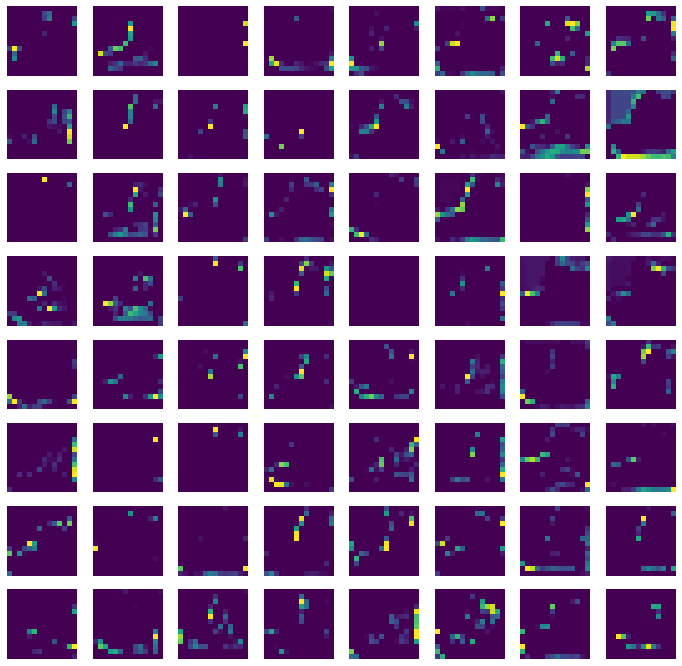

In [68]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
plt.show()